# Question One

### Project One Objective

Microsoft called us for help. They built a studio and would like to start producing movies. They're asking what the best films are and how they can make great films. Using provided data, we will give our best recommendations. 

# Which genres or themes get the highest ratings?

### First, let's import the data. 

In [2]:
import patoolib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

CONTRIBUTING.md
LICENSE.md
Project Cleaning Rotten Tomatoes Only.ipynb
Project Cleaning.ipynb
Project Instructions.md
Question 1.ipynb
Question 2 .ipynb
Question 3.ipynb
Question 4.ipynb
README.md
awesome.gif
data
project_pdf_submission.gif
repo_pdf.gif
student.ipynb
video_recording_submission.gif
zippedData


In [4]:
cd\zippedData

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online/zippedData


In [5]:
cd\unzipped

/Users/jaklynsoler/flatiron/class-material/section01/PROJECT_ONE/dsc-phase-1-project-online/zippedData/unzipped


### We will be able to make use of this title_ratings dataframe since it has the ratings we will need.

In this dataset, the tconst values are unique id numbers that correlate to movie titles. 

In [6]:
title_ratings = pd.read_csv('imdb.title.ratings.csv')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### We are going to slice the title_info dataframe into a smaller dataframe with only the tconst, original_title, and genres columns.

In [7]:
title_info = pd.read_csv('imdb.title.basics.csv')
title_info.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
title_info_small = title_info.loc[:,['tconst', 'original_title', 'genres']]

### Let's see how it turned out:

In [9]:
title_info_small.head()

,tconst,original_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,"Comedy,Drama,Fantasy"


In [10]:
title_info_small.shape

(146144, 3)

### It looks like we have quite an issue with the genres column. 

We will need to separate the genre values into individual cells. After separating them, we will evaluate them by rating. 

In [11]:
the_split_genres_df = title_info_small['genres'].str.split(',', expand = True)

As you can see below, splitting the column separated the genre values horizontally, not vertically. This means that the index still correlates to the tconst values in the title_info_small dataframe. We can verify this by looking at the shape of the title_info_small dataframe and seeing that it is the same as the dataframe titled the_split_genres.

In [12]:
the_split_genres_df.head()

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy


In [13]:
the_split_genres_df.shape

(146144, 3)

### We're going to join these two tables by using the tconst values as a key, so let's go ahead and add it to the dataframe titled the_split_genres_df.

In [14]:
the_split_genres_df.head()

,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
3,Comedy,Drama,None
4,Comedy,Drama,Fantasy


In [15]:
the_split_genres_df['tconst'] = title_info_small['tconst']

In [16]:
the_split_genres_df.head()

,0,1,2,tconst
0,Action,Crime,Drama,tt0063540
1,Biography,Drama,None,tt0066787
2,Drama,None,None,tt0069049
3,Comedy,Drama,None,tt0069204
4,Comedy,Drama,Fantasy,tt0100275


That tconst column looks great. 

### Now, we are going to 'melt' the genres so that they have their own row in order to evaluate them by rating. 

In [17]:
vertical_genres = the_split_genres_df.melt(id_vars = ['tconst'], value_name = 'genre')

In [18]:
vertical_genres.head()

,tconst,variable,genre
0,tt0063540,0,Action
1,tt0066787,0,Biography
2,tt0069049,0,Drama
3,tt0069204,0,Comedy
4,tt0100275,0,Comedy


In [19]:
vertical_genres.shape

(438432, 3)

### Let's set the index to the tconst column and join the ratings from the title_ratings dataframe.

In [20]:
vertical_genres.set_index('tconst', inplace = True)

In [21]:
title_ratings.set_index('tconst', inplace = True)

In [22]:
genre_and_ratings_df = vertical_genres.join(title_ratings, how = 'inner')

In [23]:
genre_and_ratings_df.shape

(221568, 4)

In [24]:
genre_and_ratings_df.head()

,variable,genre,averagerating,numvotes
tconst,,,,
tt0063540,0,Action,7.0,77
tt0063540,1,Crime,7.0,77
tt0063540,2,Drama,7.0,77
tt0066787,0,Biography,7.2,43
tt0066787,1,Drama,7.2,43


### Now, let's reset the index to return the tconst values to a column.

In [25]:
genre_and_ratings_df.reset_index(inplace = True)

### Finally, it's time to group the dataframe rows by the genre that they belong to. 

Additionally the code below will calculate average based off of the grouped genres. 

In [26]:
genre_averages = genre_and_ratings_df.groupby('genre').averagerating.mean()

Let's take a look at the averages! 

In [27]:
genre_averages

genre
Action         5.810361
Adult          3.766667
Adventure      6.196201
Animation      6.248308
Biography      7.162274
Comedy         6.002689
Crime          6.115441
Documentary    7.332090
Drama          6.401559
Family         6.394725
Fantasy        5.919473
Game-Show      7.300000
History        7.040956
Horror         5.003440
Music          7.091972
Musical        6.498336
Mystery        5.920401
News           7.271330
Reality-TV     6.500000
Romance        6.146608
Sci-Fi         5.489755
Short          8.800000
Sport          6.961493
Thriller       5.639114
War            6.584291
Western        5.868214
Name: averagerating, dtype: float64

### Next, we will need to change this series into a dataframe in order to further manipulate it. 

In [28]:
gen_avg_df = genre_averages.to_frame()

In [29]:
gen_avg_df.rename(columns={'genre': 'Genre', 'averagerating': 'Average Rating'}, inplace = True)

### Let's see the average genres.. 

In [30]:
gen_avg_df

,Average Rating
genre,
Action,5.810361
Adult,3.766667
Adventure,6.196201
Animation,6.248308
Biography,7.162274
Comedy,6.002689
Crime,6.115441
Documentary,7.332090
Drama,6.401559


### Now, let's reset the index so that we can sort these values. 

In [31]:
gen_avg_df.reset_index(inplace = True)

Also, let's rename the column titles. 

In [32]:
gen_avg_df.rename(columns={'genre' : 'Genre'}, inplace = True)

We'll sort these values into descending order so that when we graph them, it will show the highest rated at the top.

In [33]:
gen_avg_df.sort_values(by=['Average Rating'], ascending=False, inplace = True)

# Which Genres/Themes Get the Highest Ratings?

### Cumulatively, movies whose genres are defined by these labels have the highest ratings.

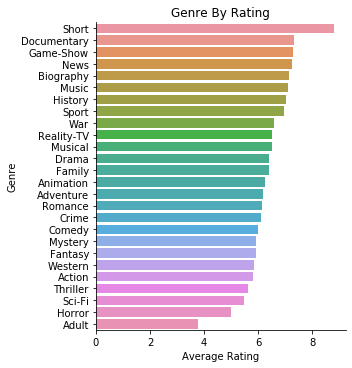

In [34]:
sns.catplot(x = 'Average Rating', y = 'Genre', data = gen_avg_df, kind = 'bar')

plt.title('Genre By Rating')

plt.show()

# Conclusion

While other attributes likely contribute to the sucess of a film, and doesn't necessarily encourage which movie genre Microsoft should capitalize on, it definitely discourages the major faux pas.
The following genres should be forbidden from the mix: 
1. Adult
2. Horror
